In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

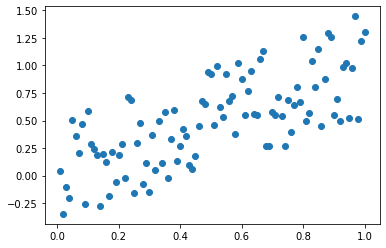

In [16]:
n = 100
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 1, n)  + np.random.rand(n) - .5

np.random.rand
plt.scatter(x,y)

In [17]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [18]:
model.coef_, model.intercept_

(array([0.98112376]), 0.0054373885826986545)

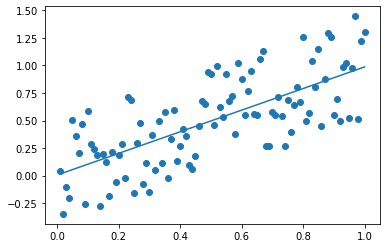

In [19]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

## How do we "test" this model on "new" data if we don't have a new dataset?

### Instead of using all of our data to produce this model, let's use some, and save the rest as a reserve 

In [20]:
model = LinearRegression()
model.fit(x[:50], y[:50])
model.coef_, model.intercept_

(array([0.92485235]), 0.004251760593088266)

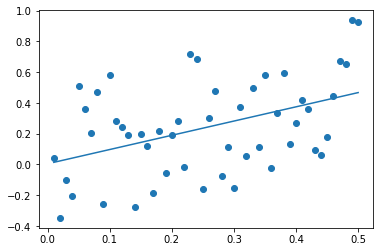

In [21]:
plt.scatter(x[:50],y[:50])
plt.plot(x[:50], np.dot(x[:50], model.coef_) + model.intercept_)

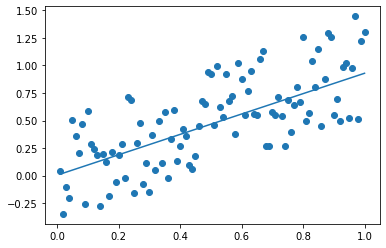

In [23]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

## Our slope doesn't match the previous slope with all the data. Why not? 
## Let's plot all of our data with this model to see

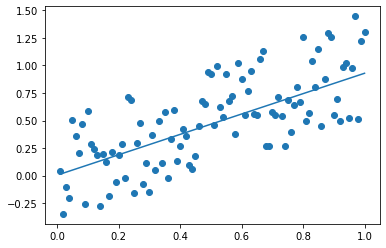

In [24]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

## We only used the first half of our data and neglected the second half. 

### Let's try this again differently. Let's shuffle our data first

In [26]:
def shuffle(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return p

In [27]:
p = shuffle(x, y)

In [28]:
p

array([20, 37, 79, 38, 14, 60, 87, 75, 82, 51, 63, 95, 69, 24, 47, 30, 55,
       83, 86, 74, 49, 41, 84, 98, 11,  2, 18, 15,  7,  8, 71, 39,  1, 61,
       44, 90, 94, 59, 10, 70, 22, 64, 23, 54, 33, 78, 48,  9, 40, 53,  6,
       27, 17, 96, 80, 72, 56, 32, 52, 92, 65, 91, 97, 93, 99, 66, 50, 25,
       26, 29, 34, 68, 45, 43,  0, 57, 35, 19, 88, 67,  3, 36, 77,  4, 76,
       85, 21, 81, 42, 28, 13, 73, 12, 62, 89,  5, 58, 46, 16, 31])

In [29]:
x[[2, 0, 1, 4]]

array([[0.03],
       [0.01],
       [0.02],
       [0.05]])

In [30]:
x[[61, 27, 92]], y[[61, 27, 92]]

(array([[0.62],
        [0.28],
        [0.93]]),
 array([ 0.7684774 , -0.0763962 ,  0.98598896]))

In [31]:
x[p], y[p]

(array([[0.21],
        [0.38],
        [0.8 ],
        [0.39],
        [0.15],
        [0.61],
        [0.88],
        [0.76],
        [0.83],
        [0.52],
        [0.64],
        [0.96],
        [0.7 ],
        [0.25],
        [0.48],
        [0.31],
        [0.56],
        [0.84],
        [0.87],
        [0.75],
        [0.5 ],
        [0.42],
        [0.85],
        [0.99],
        [0.12],
        [0.03],
        [0.19],
        [0.16],
        [0.08],
        [0.09],
        [0.72],
        [0.4 ],
        [0.02],
        [0.62],
        [0.45],
        [0.91],
        [0.95],
        [0.6 ],
        [0.11],
        [0.71],
        [0.23],
        [0.65],
        [0.24],
        [0.55],
        [0.34],
        [0.79],
        [0.49],
        [0.1 ],
        [0.41],
        [0.54],
        [0.07],
        [0.28],
        [0.18],
        [0.97],
        [0.81],
        [0.73],
        [0.57],
        [0.33],
        [0.53],
        [0.93],
        [0.66],
        [0.92],
        

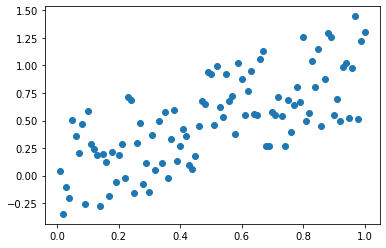

In [35]:
plt.scatter(x[p],y[p])

### Still plots the same scatter plot

### So, let's use the first 50 points of the shuffled data instead and see if the model is similar 

In [36]:
model = LinearRegression()
model.fit(x[p][:50], y[p][:50])
model.coef_, model.intercept_


(array([1.00051275]), 0.04601132577637601)

### Success! We got a similar slope as before with half of the points 

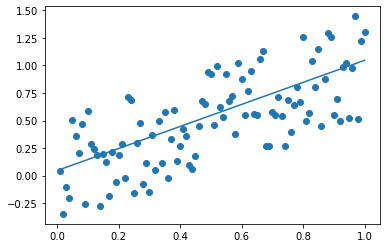

In [37]:

plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

###  So how do we check the validity of the model on the rest of the points? The loss (Error) function of course!
### $E = \Sigma err(y - \hat{y}) = \Sigma err(y - \beta \cdot x)$

### $E = \frac{1}{N}\Sigma err( y - \hat{y}) = \frac{1}{N}\Sigma err(y - \beta \cdot x)$
### Why divide by N? 
This way we have a _mean_ error that's invariant to the number of points you use to build your model. Otherwise, your error would increase with the number of points

In [38]:
x[50:]

array([[0.51],
       [0.52],
       [0.53],
       [0.54],
       [0.55],
       [0.56],
       [0.57],
       [0.58],
       [0.59],
       [0.6 ],
       [0.61],
       [0.62],
       [0.63],
       [0.64],
       [0.65],
       [0.66],
       [0.67],
       [0.68],
       [0.69],
       [0.7 ],
       [0.71],
       [0.72],
       [0.73],
       [0.74],
       [0.75],
       [0.76],
       [0.77],
       [0.78],
       [0.79],
       [0.8 ],
       [0.81],
       [0.82],
       [0.83],
       [0.84],
       [0.85],
       [0.86],
       [0.87],
       [0.88],
       [0.89],
       [0.9 ],
       [0.91],
       [0.92],
       [0.93],
       [0.94],
       [0.95],
       [0.96],
       [0.97],
       [0.98],
       [0.99],
       [1.  ]])

In [46]:
np.dot(x[50:], model.coef_) + model.intercept_

array([0.55627283, 0.56627796, 0.57628308, 0.58628821, 0.59629334,
       0.60629847, 0.61630359, 0.62630872, 0.63631385, 0.64631898,
       0.6563241 , 0.66632923, 0.67633436, 0.68633949, 0.69634461,
       0.70634974, 0.71635487, 0.72636   , 0.73636512, 0.74637025,
       0.75637538, 0.76638051, 0.77638563, 0.78639076, 0.79639589,
       0.80640102, 0.81640614, 0.82641127, 0.8364164 , 0.84642153,
       0.85642665, 0.86643178, 0.87643691, 0.88644204, 0.89644716,
       0.90645229, 0.91645742, 0.92646255, 0.93646767, 0.9464728 ,
       0.95647793, 0.96648306, 0.97648818, 0.98649331, 0.99649844,
       1.00650357, 1.01650869, 1.02651382, 1.03651895, 1.04652408])

In [45]:
y[50:] - (np.dot(x[50:], model.coef_) + model.intercept_)

array([-0.09797053,  0.43284207,  0.04700485, -0.05185686,  0.32267746,
        0.06762729,  0.10990418, -0.25117735,  0.38353436,  0.22816607,
       -0.10842705,  0.10214817,  0.27592061, -0.12821547, -0.14735244,
        0.3478099 ,  0.41589048, -0.45412035, -0.47142705, -0.1648819 ,
       -0.20196697, -0.04915026, -0.23212187, -0.52184903, -0.11256772,
       -0.41444403, -0.17255793, -0.02508874, -0.16744831,  0.41540116,
       -0.35784664, -0.30121196,  0.16188836, -0.07810014,  0.24867318,
       -0.4597817 , -0.04337091,  0.36581996,  0.320125  , -0.39919869,
       -0.26388165, -0.47026549,  0.00950078,  0.03914848, -0.47166355,
       -0.02822962,  0.43030584, -0.51034861,  0.18650739,  0.26173763])

In [43]:
np.square(y[50:] - (np.dot(x[50:], model.coef_) + model.intercept_))

array([9.59822510e-03, 1.87352261e-01, 2.20945600e-03, 2.68913387e-03,
       1.04120745e-01, 4.57345049e-03, 1.20789287e-02, 6.30900587e-02,
       1.47098608e-01, 5.20597566e-02, 1.17564244e-02, 1.04342491e-02,
       7.61321843e-02, 1.64392061e-02, 2.17127417e-02, 1.20971727e-01,
       1.72964894e-01, 2.06225293e-01, 2.22243464e-01, 2.71860415e-02,
       4.07906575e-02, 2.41574810e-03, 5.38805610e-02, 2.72326408e-01,
       1.26714908e-02, 1.71763852e-01, 2.97762395e-02, 6.29444715e-04,
       2.80389352e-02, 1.72558127e-01, 1.28054215e-01, 9.07286477e-02,
       2.62078413e-02, 6.09963207e-03, 6.18383515e-02, 2.11399209e-01,
       1.88103544e-03, 1.33824244e-01, 1.02480015e-01, 1.59359596e-01,
       6.96335267e-02, 2.21149636e-01, 9.02647768e-05, 1.53260370e-03,
       2.22466506e-01, 7.96911426e-04, 1.85163115e-01, 2.60455702e-01,
       3.47850050e-02, 6.85065867e-02])

In [47]:
np.sum(np.square(y[50:] - (np.dot(x[50:], model.coef_) + model.intercept_)))

4.2422409576910285

In [49]:
np.sum(np.square(y[p][50:] - (np.dot(x[p][50:], model.coef_) + model.intercept_)))/50

0.09567914352688175

### Is there a shorter way of calculating this error?
Why yes, of course! Scikit-Learn to the rescue

In [50]:
from sklearn.metrics import mean_squared_error

In [58]:
mean_squared_error(y[p][50:], np.dot(x[p][50:], model.coef_) + model.intercept_)

0.078545133436026718

### Why the slight discrepancy in values? 
Let's check the Documentation
[http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error]

Turns out sklearn sums N-1 values and not all N because Statistics
[http://stats.stackexchange.com/questions/17890/what-is-the-difference-between-n-and-n-1-in-calculating-population-variance]

## Is there an easier way to shuffle the data?
I'm glad you asked [http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html]

In [59]:
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)

In [69]:
from sklearn.linear_model import Ridge

In [79]:
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([0.78314048]), 0.07821979819985109)

In [71]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([0.98648504]), -0.027560039870160313)

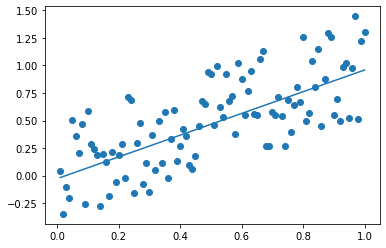

In [72]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

In [75]:
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

0.08712553772303135

In [83]:
mean_squared_error(y_train, y_test)

0.31528300440219464

In [76]:
mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.07384345494868555

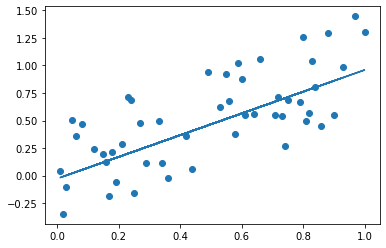

In [77]:
plt.scatter(x_test,y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_)

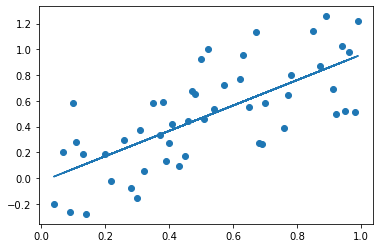

In [78]:
plt.scatter(x_train,y_train)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_)

## Ridge 

In [80]:
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

0.09011266439656446

In [82]:
mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.07702840202230465